# Simple Linear Regression
# Estimating the amount paid to the taxi driver

In [49]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df_taxi = pd.DataFrame({
        'Kilometres': [1, 2, 3, 4, 5],
        'Paid (incl. tips)': [8, 10, 14, 15, 20],
    })

In [50]:
df_taxi

,Kilometres,Paid (incl. tips)
0,1,8
1,2,10
2,3,14
3,4,15
4,5,20


<ipython-input-51-f9fa16ed7474>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


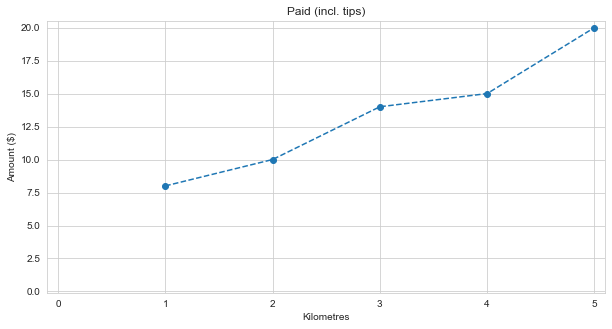

In [51]:
fig, axs = plt.subplots(figsize=(10, 5))

df_taxi.set_index('Kilometres')['Paid (incl. tips)'].plot(
    title='Paid (incl. tips)', kind='line', marker='o', linestyle='--', grid=True
)

axs.set_xlabel('Kilometres')
axs.set_ylabel('Amount ($)')
axs.set_xlim((-0.1,5.1))
axs.set_ylim((-0.1,20.5))

fig.show()

## Running Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
reg = LinearRegression()
reg.fit(df_taxi[['Kilometres']], df_taxi['Paid (incl. tips)'])

# Make predictions
df_taxi['Paid (Predicted)'] = reg.predict(df_taxi[['Kilometres']])

# Regression intercept & coefficients
print('Amount Paid = {:.1f} + {:.1f} * Distance'.format(reg.intercept_, reg.coef_[0]))

Amount Paid = 4.7 + 2.9 * Distance


## Plotting the Regressed Line


<ipython-input-37-7294151bb64e>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


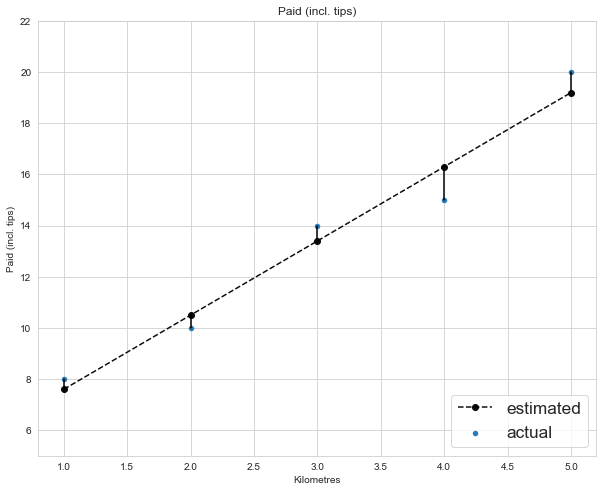

In [37]:
fig, ax = plt.subplots(figsize=(10, 8), sharex=False, sharey=False)

df_taxi.tail(5).plot(
    label='actual', kind='scatter', x='Kilometres', y='Paid (incl. tips)',
    marker='o', alpha=0.95, ax=ax
)

df_taxi.tail(5).set_index('Kilometres')['Paid (Predicted)'].plot(
    title='Paid (incl. tips)', label='estimated', kind='line',
    marker='o', linestyle='--', color='k', alpha=0.95, ax=ax
)

x_min, m_max = 0.8, 5.2
y_min, y_max = 5, 22

ax.set_xlim((x_min, m_max))
ax.set_ylim((y_min, y_max))

for x, y1, y2 in df_taxi.tail(5)[
    ['Kilometres', 'Paid (incl. tips)', 'Paid (Predicted)']
].values.tolist():
    ymin, ymax = min(y1, y2), max(y1, y2)
    ymin, ymax = (ymin-y_min)/(y_max-y_min) , (ymax-y_min)/(y_max-y_min)
    ax.axvline(x=x, ymin=ymin, ymax=ymax, color='k')

ax.legend(loc='lower right', fontsize='xx-large')

fig.show()

<ipython-input-44-43754578dea6>:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


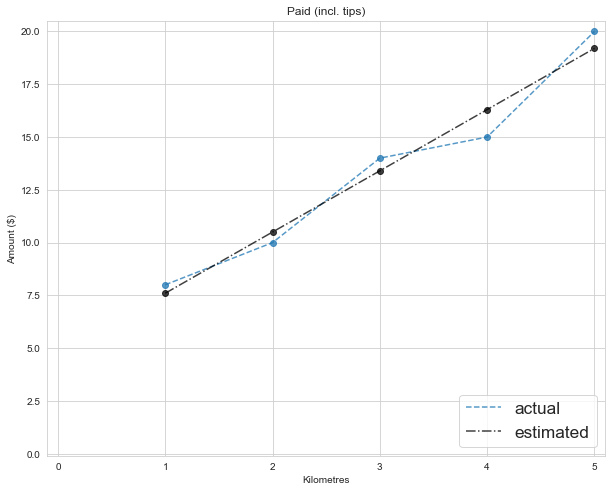

In [44]:
fig, axs = plt.subplots(figsize=(10, 8), sharex=False, sharey=False)

df_taxi.set_index('Kilometres')['Paid (incl. tips)'].plot(
    label='actual', kind='line',
    marker='o', linestyle='--', alpha=0.75
)

df_taxi.set_index('Kilometres')['Paid (Predicted)'].plot(
    title='Paid (incl. tips)', label='estimated', kind='line',
    marker='o', linestyle='-.', color='k', alpha=0.75
)

axs.set_xlabel('Kilometres')
axs.set_ylabel('Amount ($)')

axs.set_xlim((-0.1,5.1))
axs.set_ylim((-0.1,20.5))

axs.legend(markerscale=0.01, loc='lower right', fontsize='xx-large')

fig.show()

## Predicting house prices in California

In [53]:
from sklearn.datasets import fetch_california_housing

# Load the data
california = fetch_california_housing()
df_dataset = pd.DataFrame(
    california.data,
    columns=california.feature_names,
)
df_dataset['target'] = california.target

## Data Exploration

In [57]:
df_dataset.shape

(20640, 9)

In [60]:
# check null values
df_dataset.isnull().sum().sum()

0

In [62]:
# Checking the target's distribution
df_dataset['target'].describe(percentiles=[0.9, 0.95, 0.99])

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
50%          1.797000
90%          3.766000
95%          4.898100
99%          5.000010
max          5.000010
Name: target, dtype: float64

In [63]:
# Understanding the loaded features
df_dataset[california.feature_names].describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


<ipython-input-66-31a99fee967e>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


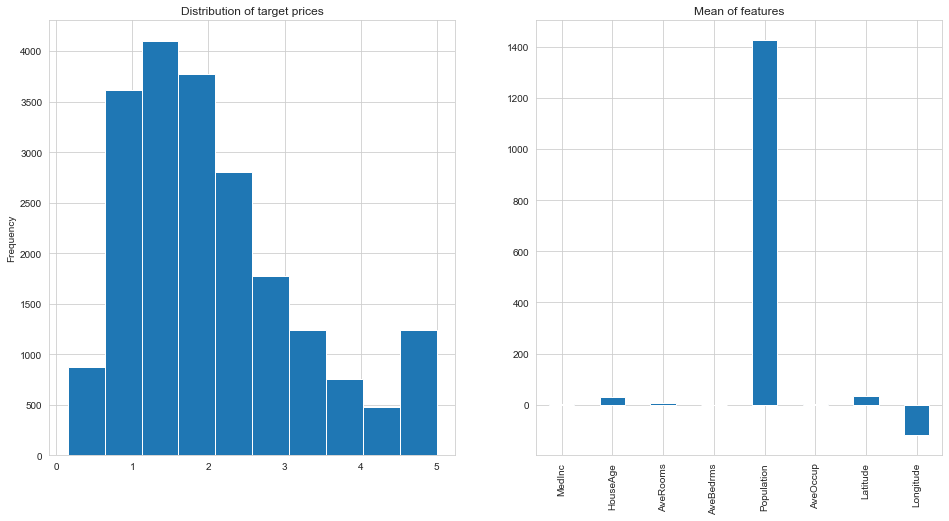

In [66]:
# Understand the distribution of the target
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
df_dataset['target'].plot(title='Distribution of target prices', kind='hist', ax=axs[0])
df_dataset[california.feature_names].mean().plot(title='Mean of features', kind='bar', ax=axs[1])

fig.show()

<ipython-input-67-193437f6b4bc>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


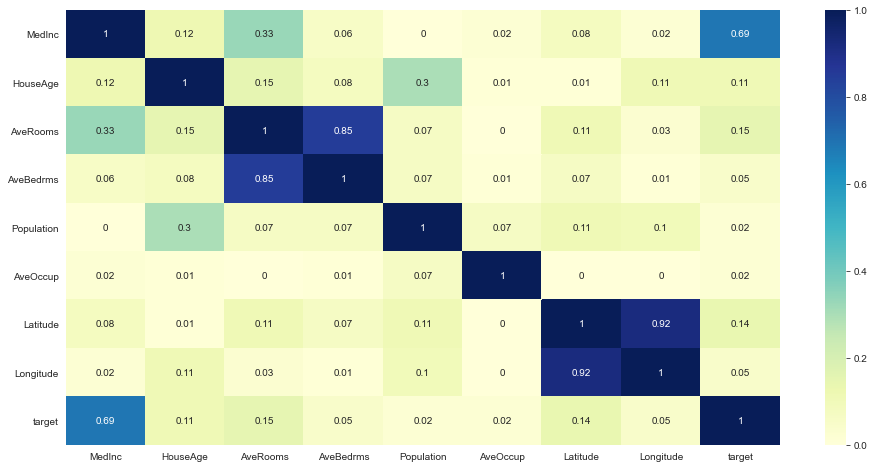

In [67]:
# Correlation Plot
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.heatmap(data=df_dataset.corr().abs().round(2), annot=True, cmap="YlGnBu", center=0.5, ax=ax)
fig.show()

## Splitting the Dataset

In [68]:
# Splitting the Dataset
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_dataset, test_size=0.4)

x_train = df_train[california.feature_names]
x_test  = df_test[california.feature_names]

y_train = df_train['target']
y_test  = df_test['target']

In [71]:
df_dataset['target'].count(), df_train['target'].count(), df_test['target'].count()

(20640, 12384, 8256)

In [69]:
df_dataset['target'].mean(), df_train['target'].mean(), df_test['target'].mean()

(2.068558169089147, 2.0601367522609824, 2.081190294331395)

In [70]:
df_dataset['target'].median(), df_train['target'].median(), df_test['target'].median()

(1.797, 1.792, 1.8065)

## Baseline Regressor

In [72]:
# Baseline Regressor
from sklearn.dummy import DummyRegressor

baselin = DummyRegressor(strategy='mean')
baselin.fit(x_train, y_train)

y_test_baselin = baselin.predict(x_test)

In [74]:
y_test_baselin[:5]

array([2.06013675, 2.06013675, 2.06013675, 2.06013675, 2.06013675])

## Linear Regressor

In [75]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

y_test_pred = reg.predict(x_test)

## Comparing our Linear Regression to the baseline model

In [76]:
# Calculate R2, MAE, MSE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_test_pred),
        r2_score(y_test, y_test_baselin)
    )
)
print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_test_baselin)
    )
)

print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_baselin)
    )
)

R2 Regressor = 0.61 vs Baseline = -0.00
MAE Regressor = 0.53 vs Baseline = 0.92
MSE Regressor = 0.52 vs Baseline = 1.35


In [79]:
# Check importance for each feature
df_feature_importance = pd.DataFrame(
    {
        'Features': x_train.columns,
        'Coeff': reg.coef_,
        'ABS(Coeff)': abs(reg.coef_),
    }
).set_index('Features').sort_values('ABS(Coeff)', ascending=False)

df_feature_importance

,Coeff,ABS(Coeff)
Features,,
AveBedrms,5.732987e-01,5.732987e-01
MedInc,4.340123e-01,4.340123e-01
Longitude,-4.338472e-01,4.338472e-01
Latitude,-4.205807e-01,4.205807e-01
AveRooms,-9.767622e-02,9.767622e-02
HouseAge,9.437625e-03,9.437625e-03
AveOccup,-3.674486e-03,3.674486e-03
Population,-9.858051e-07,9.858051e-07


<ipython-input-80-0aa2a6256da2>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


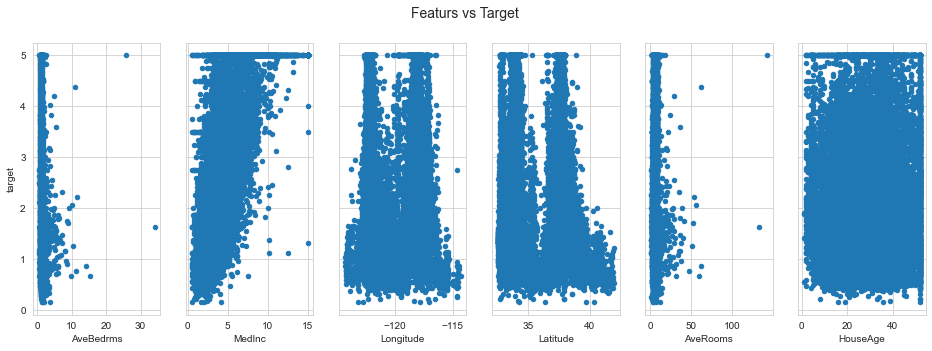

In [80]:
important_featurs = df_feature_importance.sort_values('ABS(Coeff)', ascending=False).index.tolist()[:6]

fig, axs = plt.subplots(1, len(important_featurs), figsize=(16, 5), sharey=True)

fig.suptitle("Featurs vs Target", fontsize=14)

for i, feature in enumerate(important_featurs):

    df_dataset.plot(
        kind='scatter',
        x=feature,
        y='target',
        ax=axs[i]
    )

fig.show()

## Features Scaling

In [82]:
# Features Scaling & Train the model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
reg = LinearRegression()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

reg.fit(x_train_scaled, y_train)
y_test_pred = reg.predict(x_test_scaled)

In [83]:
# Calculate R2, MAE, MSE - After Features Scaling
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_test_pred),
        r2_score(y_test, y_test_baselin)
    )
)
print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_test_baselin)
    )
)

print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_baselin)
    )
)

R2 Regressor = 0.61 vs Baseline = -0.00
MAE Regressor = 0.53 vs Baseline = 0.92
MSE Regressor = 0.52 vs Baseline = 1.35


In [84]:
# Check importance for each feature - After Features Scaling
df_feature_importance = pd.DataFrame(
    {
        'Features': x_train.columns,
        'Coeff': reg.coef_,
        'ABS(Coeff)': abs(reg.coef_),
    }
).set_index('Features').sort_values('ABS(Coeff)', ascending=False)

df_feature_importance

,Coeff,ABS(Coeff)
Features,,
AveBedrms,19.315389,19.315389
AveRooms,-13.778494,13.778494
MedInc,6.293265,6.293265
AveOccup,-4.564714,4.564714
Longitude,-4.355826,4.355826
Latitude,-3.957664,3.957664
HouseAge,0.481319,0.481319
Population,-0.015888,0.015888


<ipython-input-86-685d6a2a0079>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


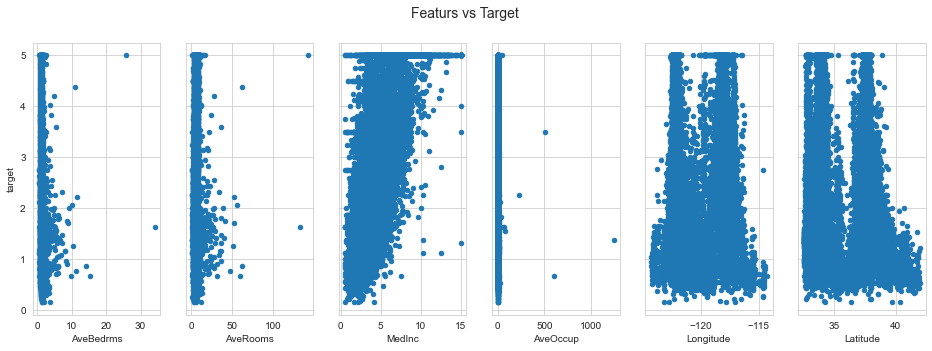

In [86]:
important_featurs = df_feature_importance.sort_values('ABS(Coeff)', ascending=False).index.tolist()[:6]

fig, axs = plt.subplots(1, len(important_featurs), figsize=(16, 5), sharey=True)

fig.suptitle("Featurs vs Target", fontsize=14)

for i, feature in enumerate(important_featurs):

    df_dataset.plot(
        kind='scatter',
        x=feature,
        y='target',
        ax=axs[i]
    )

fig.show()

## Features Transformation

In [90]:
# Polynomial Transformation
from sklearn.preprocessing import PolynomialFeatures

# degree=3 to get both the quadratic and cubic feature transformation
poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [96]:
x_train_poly

array([[ 1.00000000e+00,  1.74180000e+00,  8.00000000e+00, ...,
        -1.52750199e+05,  5.08953932e+05, -1.69580208e+06],
       [ 1.00000000e+00,  1.37500000e+00,  4.90000000e+01, ...,
        -1.74981685e+05,  5.65556718e+05, -1.82793074e+06],
       [ 1.00000000e+00,  3.32810000e+00,  2.50000000e+01, ...,
        -1.34796496e+05,  4.70551435e+05, -1.64261432e+06],
       ...,
       [ 1.00000000e+00,  3.10620000e+00,  1.10000000e+01, ...,
        -1.29570688e+05,  4.57533090e+05, -1.61561639e+06],
       [ 1.00000000e+00,  5.64930000e+00,  4.00000000e+01, ...,
        -1.72966322e+05,  5.63256382e+05, -1.83421691e+06],
       [ 1.00000000e+00,  2.70140000e+00,  3.50000000e+01, ...,
        -1.35103931e+05,  4.70608700e+05, -1.63927539e+06]])

In [98]:
# Reclaim our column names
feature_translator = [(f'x{i}', feature) for i, feature in enumerate(x_train.columns, 0)]

def translate_feature_names(s):
    for key, val in reversed(feature_translator):
        s = s.replace(key, val)
    return s

poly_features = [
    translate_feature_names(f) for f in poly.get_feature_names_out()
]

x_train_poly = pd.DataFrame(x_train_poly, columns=poly_features)
x_test_poly = pd.DataFrame(x_test_poly, columns=poly_features)

In [99]:
x_train_poly

,1,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc^2,...,AveOccup^3,AveOccup^2 Latitude,AveOccup^2 Longitude,AveOccup Latitude^2,AveOccup Latitude Longitude,AveOccup Longitude^2,Latitude^3,Latitude^2 Longitude,Latitude Longitude^2,Longitude^3
0,1.0,1.7418,8.0,4.754360,1.158430,2700.0,3.924419,35.79,-119.25,3.033867,...,60.440212,551.203987,-1836.576570,5026.882369,-16749.251817,55807.440044,45844.273539,-152750.198925,508953.931875,-1.695802e+06
1,1.0,1.3750,49.0,5.030395,1.112462,754.0,2.291793,37.83,-122.27,1.890625,...,12.037224,198.695137,-642.200749,3279.805807,-10600.630612,34262.202087,54138.849687,-174981.685203,565556.718207,-1.827931e+06
2,1.0,3.3281,25.0,5.102729,1.025682,2526.0,4.054575,33.80,-117.99,11.076250,...,66.655486,555.657652,-1939.705513,4632.108250,-16169.895043,56446.328881,38614.472000,-134796.495600,470551.435380,-1.642614e+06
3,1.0,3.2215,8.0,6.268671,1.062076,3213.0,3.116392,34.45,-117.27,10.378062,...,30.266080,334.574892,-1138.914299,3698.541642,-12590.071939,42857.408892,40885.346125,-139176.329175,473765.112405,-1.612727e+06
4,1.0,2.6635,32.0,4.155629,1.119205,782.0,2.589404,32.79,-116.97,7.094232,...,17.361987,219.857374,-784.285363,2784.085981,-9931.519889,35428.175708,35255.286639,-125764.284177,448632.153711,-1.600381e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,1.0,3.0757,39.0,4.524664,1.002242,1221.0,2.737668,37.80,-122.21,9.459930,...,20.518349,283.304459,-915.942803,3911.689776,-12646.762103,40887.851763,54010.152000,-174618.536400,564553.738980,-1.825241e+06
12380,1.0,3.5865,37.0,5.167539,0.979058,551.0,2.884817,33.94,-117.40,12.862982,...,24.007929,282.454372,-977.022488,3323.088501,-11494.713906,39760.736963,39096.286984,-135235.830640,467786.874400,-1.618096e+06
12381,1.0,3.1062,11.0,5.140303,1.041265,2212.0,3.042641,33.23,-117.34,9.648478,...,28.167749,307.632181,-1086.294317,3359.784284,-11863.890699,41893.136764,36693.659267,-129570.688486,457533.090188,-1.615616e+06
12382,1.0,5.6493,40.0,6.744382,1.075843,894.0,2.511236,37.59,-122.41,31.914590,...,15.836622,237.054043,-771.954920,3548.396746,-11555.180783,37628.882139,53114.974479,-172966.321521,563256.382479,-1.834217e+06


In [100]:
# Fitting the linear regressor with the derived features
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=False)
reg.fit(x_train_poly, y_train)

y_test_pred = reg.predict(x_test_poly)

In [105]:
# Calculate R2, MAE, MSE - With derived Features
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(
    'R2 Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        r2_score(y_test, y_test_pred),
        r2_score(y_test, y_test_baselin)
    )
)
print(
    'MAE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_absolute_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_test_baselin)
    )
)

print(
    'MSE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_squared_error(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_baselin)
    )
)

R2 Regressor = -281.533 vs Baseline = -0.0
MAE Regressor = 0.662 vs Baseline = 0.9
MSE Regressor = 381.916 vs Baseline = 1.4


In [107]:
x_train_poly.shape

(12384, 165)

In [108]:
x_train_poly.corr()

,1,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc^2,...,AveOccup^3,AveOccup^2 Latitude,AveOccup^2 Longitude,AveOccup Latitude^2,AveOccup Latitude Longitude,AveOccup Longitude^2,Latitude^3,Latitude^2 Longitude,Latitude Longitude^2,Longitude^3
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MedInc,NaN,1.000000,-0.139728,0.304706,-0.050455,0.016174,0.027908,-0.078512,-0.015003,0.942507,...,0.031369,0.031923,-0.031907,0.026966,-0.027675,0.028381,-0.083482,0.070278,-0.046439,-0.014922
HouseAge,NaN,-0.139728,1.000000,-0.143055,-0.065965,-0.303908,0.013835,0.010823,-0.107076,-0.101659,...,0.012253,0.013014,-0.012965,0.013830,-0.014176,0.014501,0.005292,-0.019792,0.045259,-0.106600
AveRooms,NaN,0.304706,-0.143055,1.000000,0.868996,-0.069933,-0.008819,0.105848,-0.029175,0.277038,...,-0.007654,-0.007352,0.007372,-0.005703,0.007019,-0.008446,0.107625,-0.097920,0.079525,-0.029295
AveBedrms,NaN,-0.050455,-0.065965,0.868996,1.000000,-0.065324,-0.006943,0.073035,0.004606,-0.038650,...,-0.004362,-0.003999,0.004033,-0.004543,0.005641,-0.006814,0.075694,-0.065101,0.045784,0.004547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AveOccup Longitude^2,NaN,0.028381,0.014501,-0.008446,-0.006814,0.074181,0.999911,0.016743,-0.008933,0.033708,...,0.931352,0.968393,-0.965423,0.998386,-0.999602,1.000000,0.017121,-0.016032,0.014088,-0.008806
Latitude^3,NaN,-0.083482,0.005292,0.107625,0.075694,-0.102815,0.010198,0.998781,-0.915338,-0.065870,...,0.013685,0.016455,-0.016149,0.035605,-0.026851,0.017121,1.000000,-0.998241,0.987121,-0.915601
Latitude^2 Longitude,NaN,0.070278,-0.019792,-0.097920,-0.065101,0.102014,-0.008922,-0.998842,0.937065,0.055114,...,-0.013472,-0.015876,0.015609,-0.034245,0.025631,-0.016032,-0.998241,1.000000,-0.994820,0.937262
Latitude Longitude^2,NaN,-0.046439,0.045259,0.079525,0.045784,-0.100435,0.006709,0.990217,-0.967558,-0.035675,...,0.013010,0.014824,-0.014620,0.031705,-0.023390,0.014088,0.987121,-0.994820,1.000000,-0.967692


In [113]:
# Check importance for each feature - After Features transformation
df_feature_importance = pd.DataFrame(
    {
        'Features': x_train_poly.columns,
        'Coeff': reg.coef_,
        'ABS(Coeff)': abs(reg.coef_),
    }
).set_index('Features').sort_values('ABS(Coeff)', ascending=False)

df_feature_importance[df_feature_importance['Coeff'].abs() > 0]

,Coeff,ABS(Coeff)
Features,,
AveOccup,3.355199e+02,3.355199e+02
Latitude,1.887338e+02,1.887338e+02
AveRooms,9.530077e+01,9.530077e+01
Longitude,7.172779e+01,7.172779e+01
MedInc,-4.963045e+01,4.963045e+01
...,...,...
HouseAge^2 Population,1.128658e-09,1.128658e-09
Population^2 Latitude,-9.359722e-10,9.359722e-10
HouseAge Population^2,-8.839021e-10,8.839021e-10


## Training the lasso regressor

In [118]:
# Training the lasso regressor
from sklearn.linear_model import Lasso

reg = Lasso(fit_intercept=False)
reg.fit(x_train_poly, y_train)

y_test_pred = reg.predict(x_test_poly)

/Users/dmmil/.pyenv/versions/env3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.968e+03, tolerance: 6.888e+00
  model = cd_fast.enet_coordinate_descent(


In [119]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(
    'R2 Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        r2_score(y_test, y_test_pred),
        r2_score(y_test, y_test_baselin)
    )
)
print(
    'MAE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_absolute_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_test_baselin)
    )
)

print(
    'MSE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_squared_error(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_baselin)
    )
)

R2 Regressor = -0.893 vs Baseline = -0.0
MAE Regressor = 0.516 vs Baseline = 0.9
MSE Regressor = 2.559 vs Baseline = 1.4


In [120]:
# Training the Ridge regressor
from sklearn.linear_model import Ridge

reg = Ridge(fit_intercept=False, solver='svd', alpha=1)
reg.fit(x_train_poly, y_train)

y_test_pred = reg.predict(x_test_poly)

In [121]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(
    'R2 Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        r2_score(y_test, y_test_pred),
        r2_score(y_test, y_test_baselin)
    )
)
print(
    'MAE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_absolute_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_test_baselin)
    )
)

print(
    'MSE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_squared_error(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_baselin)
    )
)

R2 Regressor = -30.810 vs Baseline = -0.0
MAE Regressor = 0.519 vs Baseline = 0.9
MSE Regressor = 42.999 vs Baseline = 1.4


## Lasso and Cross validation

In [122]:
# lasso and Cross validation
import numpy as np
from sklearn.linear_model import LassoCV

alphas = np.logspace(-6, 6, 50)

reg = LassoCV(alphas=alphas, fit_intercept=False, cv=5, n_jobs=5)

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("always", ConvergenceWarning)

with warnings.catch_warnings(record=True) as w:
    reg.fit(x_train_poly, y_train)

y_train_pred = reg.predict(x_train_poly)
y_test_pred = reg.predict(x_test_poly)

In [123]:
f'{alphas.min():.6f}, {alphas.max():,.0f}'

'0.000001, 1,000,000'

In [124]:
print(f"LassoCV: Chosen alpha = {reg.alpha_}")

LassoCV: Chosen alpha = 33932.217718953296


<ipython-input-130-2b365b766d56>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


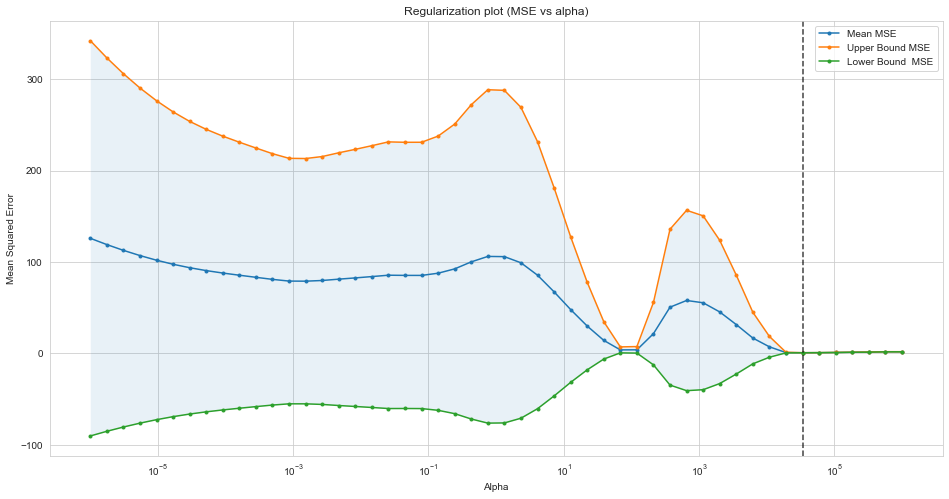

In [130]:
# Regularization Plots
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

n_folds = reg.mse_path_.shape[1]

mse_mean = reg.mse_path_.mean(axis=1)
mse_std = reg.mse_path_.std(axis=1)
mse_std_error = mse_std / np.sqrt(n_folds)

pd.DataFrame(
    {
        'alpha': reg.alphas_,
        'Mean MSE': mse_mean,
        'Upper Bound MSE': mse_mean + 1.96 * mse_std_error,
        'Lower Bound  MSE': mse_mean - 1.96 * mse_std_error,
    }
).set_index('alpha')[['Mean MSE', 'Upper Bound MSE', 'Lower Bound  MSE']].plot(
    title='Regularization plot (MSE vs alpha)', marker='.', logx=True, ax=ax
)

plt.fill_between(reg.alphas_, mse_mean + 1.96 * mse_std_error, mse_mean - 1.96 * mse_std_error, alpha=0.1)

ax.axvline(reg.alpha_,  linestyle='--', color='k', alpha=0.75,)

ax.set_xlabel('Alpha')
ax.set_ylabel('Mean Squared Error')

fig.show()

In [127]:
# n_folds equals to 5 here
n_folds = reg.mse_path_.shape[1]

# Calculate the mean and standard error for MSEs
mse_mean = reg.mse_path_.mean(axis=1)
mse_std = reg.mse_path_.std(axis=1)
# Std Error = Std Deviation / SQRT(number of samples)
mse_std_error = mse_std / np.sqrt(n_folds)

Text(0, 0.5, 'Mean Squared Error')

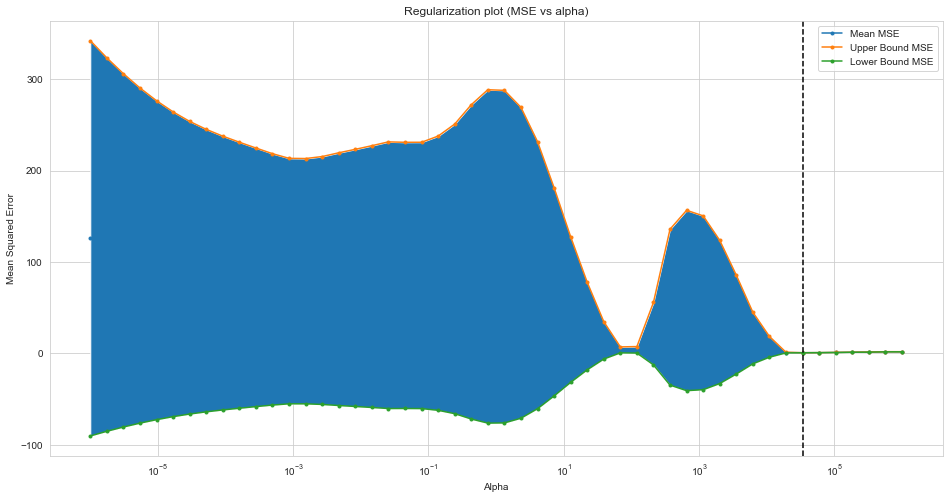

In [128]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

# We multiply by 1.96 for a 95% Confidence Interval
pd.DataFrame(
    {
        'alpha': reg.alphas_,
        'Mean MSE': mse_mean,
        'Upper Bound MSE': mse_mean + 1.96 * mse_std_error,
        'Lower Bound MSE': mse_mean - 1.96 * mse_std_error,
    }
).set_index('alpha')[
    ['Mean MSE', 'Upper Bound MSE', 'Lower Bound MSE']
].plot(
    title='Regularization plot (MSE vs alpha)',
    marker='.', logx=True, ax=ax
)

# Color the confidence interval
plt.fill_between(
    reg.alphas_,
    mse_mean + 1.96 * mse_std_error,
    mse_mean - 1.96 * mse_std_error,
)

# Print a vertical line for the chosen alpha
ax.axvline(reg.alpha_, linestyle='--', color='k')
ax.set_xlabel('Alpha')
ax.set_ylabel('Mean Squared Error')

In [129]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(
    'R2 Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        r2_score(y_test, y_test_pred),
        r2_score(y_test, y_test_baselin)
    )
)
print(
    'MAE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_absolute_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_test_baselin)
    )
)

print(
    'MSE Regressor = {:.3f} vs Baseline = {:.1f}'.format(
        mean_squared_error(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_baselin)
    )
)

R2 Regressor = -0.973 vs Baseline = -0.0
MAE Regressor = 0.691 vs Baseline = 0.9
MSE Regressor = 2.667 vs Baseline = 1.4


## Regression Ranges

In [132]:
df_noisy = pd.DataFrame(
    {
        'x': np.random.randint(0, 30, size=150),
        'noise': np.random.normal(loc=0.0, scale=5.0, size=150)
    }
)

df_noisy['y'] = df_noisy['x'] + df_noisy['noise']

<AxesSubplot:xlabel='x', ylabel='y'>

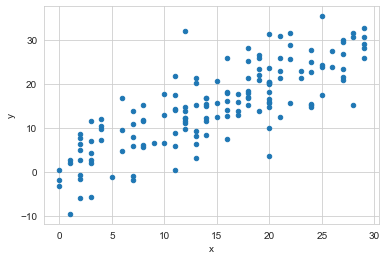

In [133]:
df_noisy.plot(
    kind='scatter', x='x', y='y'
)

In [136]:
# Train two regressors on the same data — LinearRegression and BayesianRidge.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge

lr = LinearRegression()
br = BayesianRidge()

lr.fit(df_noisy[['x']], df_noisy['y'])
df_noisy['y_lr_pred'] = lr.predict(df_noisy[['x']])


br.fit(df_noisy[['x']], df_noisy['y'])
df_noisy['y_br_pred'], df_noisy['y_br_std'] = br.predict(df_noisy[['x']], return_std=True)

<ipython-input-135-cbcd24235b7c>:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


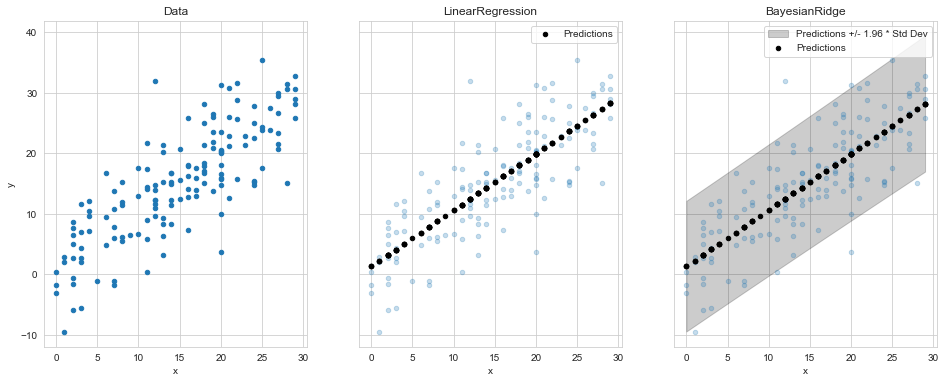

In [135]:
# Plots for the two models and their predictions
fig, axs = plt.subplots(1, 3, figsize=(16, 6), sharex=True, sharey=True)

df_noisy.sort_values('x').plot(
    title='Data', kind='scatter', x='x', y='y', ax=axs[0]
)

df_noisy.sort_values('x').plot(
    kind='scatter', x='x', y='y', ax=axs[1], marker='o', alpha=0.25
)

axs[2].fill_between(
    df_noisy.sort_values('x')['x'],
    df_noisy.sort_values('x')['y_br_pred'] - 1.96 * df_noisy.sort_values('x')['y_br_std'],
    df_noisy.sort_values('x')['y_br_pred'] + 1.96 * df_noisy.sort_values('x')['y_br_std'],
    color="k", alpha=0.2, label="Predictions +/- 1.96 * Std Dev"
)

df_noisy.sort_values('x').plot(
    kind='scatter', x='x', y='y', ax=axs[2], marker='o', alpha=0.25
)

df_noisy.sort_values('x').plot(
    title='LinearRegression', kind='scatter', x='x', y='y_lr_pred',
    ax=axs[1], marker='o', color='k', label='Predictions'
)

df_noisy.sort_values('x').plot(
    title='BayesianRidge', kind='scatter', x='x', y='y_br_pred',
    ax=axs[2], marker='o', color='k', label='Predictions'
)

axs[1].legend()
axs[2].legend()

fig.show()